<a href="https://colab.research.google.com/github/nce-saloma/job-search/blob/main/CST_2312_Web_Scrapping_Project___Emily_Saloma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
'''
LinkedIn Web Scrapping Project: For my web scrapping project, I decided to use LinkedIn, a website designed to help people find jobs.

When this project was first assigned to us, I was struggling to think of ideas for what I wanted to focus my project on.
All I knew was that I wanted to make something practical, a program that I could build upon in the future.
Around the same time I was thinking of ideas, I had a brother and a sister both looking for jobs - often voicing their frustrations at how difficult it was to sift through so many jobs
at once and look at the requirments for each. It was then that I thought of an idea to build a program that would extract data that my siblings were looking for from job postings.

What made LinkedIn a good choice of website for me was how organized the HTML was. With a single tag and attribute, I could compile as much of that specific data as I wanted from multiple pages.
Furthermore, if I were to replace the main link with another LinkedIn page, one that would give me jobs outside of the one I picked for this project, the code below will still work.

As I mentioned before, this is a project I could see myself expanding upon in the future. For my next steps, I would like to add a way for the user to input any main LinkdeIn page of their choice
and display data the user is looking for. I would also like to add more data values - in cases like the example below, seeing which computer-science oriented companies are looking for applicants with experience in Python/SQL/R and more.

'''

'\nLinkedIn Web Scrapping Project: For my web scrapping project, I decided to use LinkedIn, a website designed to help people find jobs.\n\nWhen this project was first assigned to us, I was struggling to think of ideas for what I wanted to focus my project on.\nAll I knew was that I wanted to make something practical, a program that I could build upon in the future.\nAround the same time I was thinking of ideas, I had a brother and a sister both looking for jobs - often voicing their frustrations at how difficult it was to sift through so many jobs\nat once and look at the requirments for each. It was then that I thought of an idea to build a program that would extract data that my siblings were looking for from job postings.\n\nWhat made LinkedIn a good choice of website for me was how organized the HTML was. With a single tag and attribute, I could compile as much of that specific data as I wanted from multiple pages.\nFurthermore, if I were to replace the main link with another Link

In [2]:
import requests
import re
from bs4 import BeautifulSoup

# All links are stored in a list
main_links = []
sub_links = []
all_links = []
all_links2 = []

# Lists where information is stored
job_name = []
job_company = []
job_seniority = []
job_salary = []
job_type = []
job_degree = []

# Cleans up HTML of a given link
def clean_data(link):
  link = link.strip()
  return link

# A Linkedin link is pasted into the code below, which collects all the HTML from the page:
website = requests.get('https://www.linkedin.com/jobs/search?keywords=Computer%20Science&location=Brooklyn%2C%20New%20York%2C%20United%20States&locationId=&geoId=104361728&f_TPR=&f_SB2=1&distance=25&f_E=2%2C3%2C4%2C5&position=1&pageNum=0')
soup = BeautifulSoup(website.content, "html.parser")

# Once the HTML is collected, BeautifulSoup is used to find all links that redirects to all Linkedin links that has a job posting on them:
for value in soup.find_all('a', href = re.compile('^https://www.linkedin.com/jobs/view')):
  main_links.append(value['href'])

# Once all the links above are collected, the web crawler goes into each indiviual link to find even more job postings, with a limit of 5 links from each HTML:
nol = 0

for main_link in main_links:
  web_1 = requests.get(main_link)
  soup_1 = BeautifulSoup(web_1.content, "html.parser")

  for sub_link in soup_1.find_all('a', href = re.compile('^https://www.linkedin.com/jobs/view'), limit=10):
    sub_links.append(sub_link['href'])

# Now that all links are collected, the code sifts through links that may cause an error (in this case, any links with the expression 'externalApply'):

all_links = main_links + sub_links

pattern = r'.*externalApply*'
pattern2 = r'.*sign-up-modal-sign-up-later'

for all in all_links:
  if re.search(pattern, all) or re.search(pattern2, all):
    all_links.remove(all)
  else:
    all_links2.append(all)
    continue

In [3]:
# The code below loops through each link in the all_values2 list and uses regex expressions to collect important data:

nol = 0

while nol < len(all_links2):

  print("Job #", nol + 1,"\b:", all_links2[nol])

  web2 = requests.get(all_links2[nol])
  soup2 = BeautifulSoup(web2.content, "html.parser")

  # Finds job title:
  job_title = soup2.find_all('h1', attrs = {'class': 'top-card-layout__title'})
  if job_title == []:
    job_name.append("N/A")
    print("Job Name: N/A")
  else:
    job_title = clean_data(job_title[0].text)
    job_name.append(job_title)
    print("Job Title:", job_title)

  # Finds job company:
  company = soup2.find_all('a', {'class': 'topcard__org-name-link'})
  if company == []:
    job_company.append("N/A")
    print("Company: N/A")
  else:
    company = clean_data(company[0].text)
    job_company.append(company)
    print("Company Name:", company)

  # Finds job senority:
  seniority = soup2.find_all('span', {'class': 'description__job-criteria-text'})
  if seniority == []:
    job_seniority.append("N/A")
    print("Job Seniority: N/A")
  else:
    seniority = clean_data(seniority[0].text)
    job_seniority.append(seniority)
    print("Seniority Level:", seniority)

  # Finds required degree:
  degree = soup2.find_all('script', {'type': 'application/ld+json'})
  if degree == []:
    job_degree.append("N/A")
    print("Degree: N/A")
  else:
    degree = clean_data(degree[0].text)

    hs = re.findall("High School", degree, re.IGNORECASE)
    associates = re.findall("Associate'?s?", degree, re.IGNORECASE)
    bachelors = re.findall("Bachelor'?s?", degree, re.IGNORECASE)
    masters = re.findall("Masters", degree, re.IGNORECASE)

    if hs != []:
      job_degree.append("High School Diploma")
      print("Job Details: High School")
    elif associates != []:
      job_degree.append("Associates")
      print("Job Details: Associates")
    elif bachelors != []:
      job_degree.append("Bachelor's")
      print("Job Details: Bachelor")
    elif masters != []:
      job_degree.append("Masters")
      print("Job Details: Masters")
    else:
      job_degree.append("N/A")
      print("Job Details: N/A")

  # Finds job salary:
  salary = soup2.find_all('div', {'class': 'salary compensation__salary'})
  if salary == []:
    job_salary.append("N/A")
    print("Salary: N/A")
  else:
    salary = clean_data(salary[0].text)
    job_salary.append(salary)
    print("Salary:", salary)

  # Moves onto the next value of the list:
  print('\n')
  nol += 1

Job # 1 : https://www.linkedin.com/jobs/view/junior-entry-software-developer-remote-at-synergisticit-4134571657?position=1&pageNum=0&refId=Z7tzMiod4qwBqNQYuvDgBQ%3D%3D&trackingId=F%2Fh0u6NvewD%2BPIHPV9IBqA%3D%3D
Job Title: Junior/Entry Software Developer(REMOTE)
Company Name: SynergisticIT
Seniority Level: Entry level
Job Details: Bachelor
Salary: $75,000.00/yr - $150,000.00/yr


Job # 2 : https://www.linkedin.com/jobs/view/junior-software-developer-remote-at-synergisticit-4092723402?position=2&pageNum=0&refId=Z7tzMiod4qwBqNQYuvDgBQ%3D%3D&trackingId=2JwsPpG9NTrE5pcqIkvLqA%3D%3D
Job Title: Junior Software Developer (Remote)
Company Name: SynergisticIT
Seniority Level: Entry level
Job Details: Associates
Salary: N/A


Job # 3 : https://www.linkedin.com/jobs/view/software-engineer-entry-junior-level-at-synergisticit-4045415110?position=3&pageNum=0&refId=Z7tzMiod4qwBqNQYuvDgBQ%3D%3D&trackingId=vrkuVOs%2FTPcZnTd9%2B5GO2g%3D%3D
Job Title: Software Engineer - Entry/Junior Level
Company Nam

In [4]:
# Creates a table for data collected above:

import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

job_data = {'Job Title': job_name, "Job Company": job_company, "Job Seniority": job_seniority, "Job Salary": job_salary, "Job Degree": job_degree, "Job Link": all_links2}
dataframe = pd.DataFrame(job_data)

print(tabulate(dataframe, headers='keys', tablefmt='psql'))

+----+--------------------------------------------------------------+-----------------------------+------------------+---------------------------------+--------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|    | Job Title                                                    | Job Company                 | Job Seniority    | Job Salary                      | Job Degree   | Job Link                                                                                                                                                                                                  |
|----+--------------------------------------------------------------+-----------------------------+------------------+---------------------------------+--------------+-----------------------------------------------------------------------------------------


 A bar graph showing the frequencies of types of experience. 



,count
Job Seniority,
Entry level,38
Not Applicable,11
Mid-Senior level,8
Internship,7
Associate,3


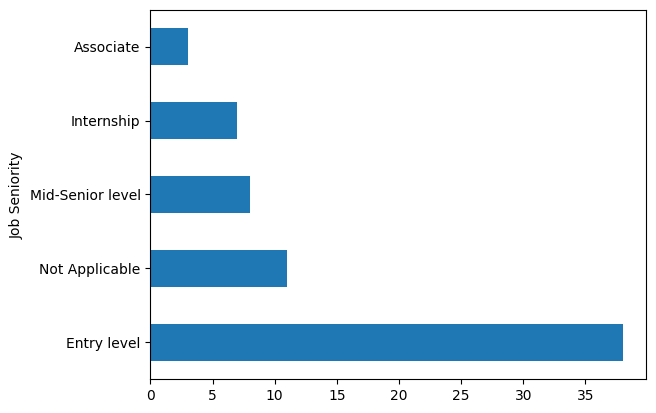

In [5]:
# Bar graph for amount of times a certain Job Senority is listed:

senior = dataframe["Job Seniority"].value_counts()
type(senior)
senior.plot(kind="barh", fontsize=10)

print("\n A bar graph showing the frequencies of types of experience. \n")

dataframe["Job Seniority"].value_counts()


 A bar graph showing the frequencies of education experience. 



,count
Job Degree,
Bachelor's,58
Associates,8
N/A,1


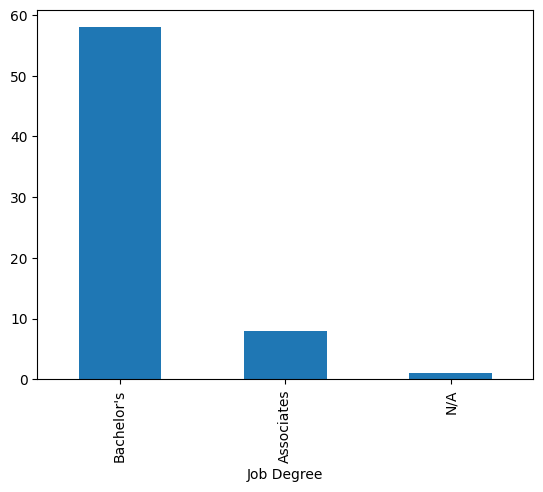

In [6]:
# Pie chart for amount of times a type of degree is listed

senior = dataframe["Job Degree"].value_counts()
type(senior)
senior.plot(kind="bar", fontsize=10)

print("\n A bar graph showing the frequencies of education experience. \n")


dataframe["Job Degree"].value_counts()

30.00/hr+ 4


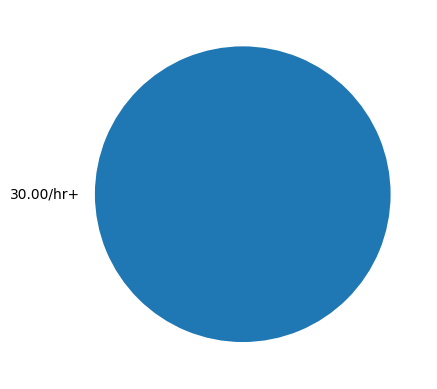


 A pie chart showing the frequencies of salaries listed (hourly). 

70,000.00/yr+ - 90,000.00/yr 5
100,000.00yr+ 19
50,000.00/yr+ - 70,000.00/yr 4
90,000.00/yr+ - 100,000.00/yr 6
0.00/yr - 50,000.00/yr 1


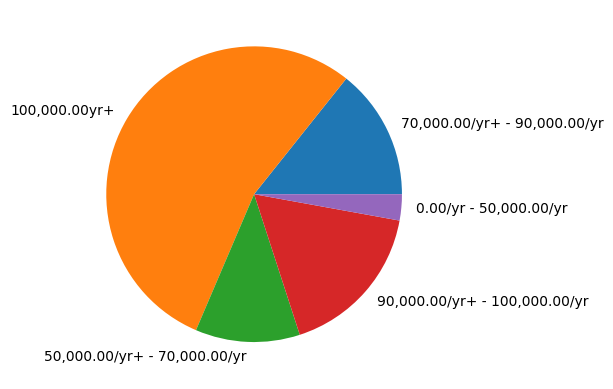


 A pie chart showing the frequencies of salaries listed (yearly). 



In [7]:
# Creates two pie charts: one for hourly salaries and one for yearly salaries:

import collections

hours = []
months = []
years = []

h_pie = []
m_pie = []
y_pie = []

hours_pat = r'.*hr.*'
months_pat = r'.mo.*'
years_pat = r'.yr.*'

# Takes the values within the job_salary list and turns them into integers; the integers will be used later to create parameters for all salaries

for sal1 in job_salary:
  if re.search(hours_pat,sal1):
    hours.append(int(re.sub(',', '', re.findall(r'[^/$][0-9]+', sal1)[0])))
  elif re.search(months_pat,sal1):
    months.append(int(re.sub(',', '', re.findall(r'[^/$][0-9]+', sal1)[0])))
  elif re.search(years_pat,sal1):
    years.append(int(re.sub(',', '', re.findall(r'[^/$][0-9]+', sal1)[0])))
  else:
    continue

# Creates a pie chart for salaries (hours):

for h in hours:
  if (h >= 0) and (h <= 15):
    h_pie.append("0.00/hr - 15.00/hr")
  elif (h >= 16) and (h <= 20):
    h_pie.append("15.00/hr+ - 20.00/hr")
  elif (h >= 21) and (h <= 25):
    h_pie.append("20.00/hr+ - 25.00/hr")
  elif (h >= 26) and (h <= 30):
    h_pie.append("25.00/hr+ - 30.00/hr")
  elif (h >= 31):
    h_pie.append("30.00/hr+")
  else:
    h_pie.append("N/A")
    print("N/A")

h_counter = collections.Counter(h_pie)
h_keys = []
h_values = []

for key, value in h_counter.items():
  h_keys.append(key)
  h_values.append(value)
  print(key, value)

plt.pie(h_values, labels=h_keys)
plt.show()

print("\n A pie chart showing the frequencies of salaries listed (hourly). \n")

# Create a pie chart for salaries (yearly):

for y in years:
  if (y >= 0) and (y <= 50) or (y == 800):
    y_pie.append("0.00/yr - 50,000.00/yr")
  elif (y >= 51) and (y <= 70):
    y_pie.append("50,000.00/yr+ - 70,000.00/yr")
  elif (y >= 71) and (y <= 90):
    y_pie.append("70,000.00/yr+ - 90,000.00/yr")
  elif (y >= 91) and (y <= 100):
    y_pie.append("90,000.00/yr+ - 100,000.00/yr")
  elif (y >= 100):
    y_pie.append("100,000.00yr+")
  else:
    y_pie.append("N/A")

y_counter = collections.Counter(y_pie)
y_keys = []
y_values = []

for key2, value2 in y_counter.items():
  y_keys.append(key2)
  y_values.append(value2)
  print(key2, value2)

plt.pie(y_values, labels=y_keys)
plt.show()

print("\n A pie chart showing the frequencies of salaries listed (yearly). \n")
